# Selection steps checks

Iván Cambón Bouzas

In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import uncertainties as un
from particle import Particle
from datetime import datetime
import sys 
import os
import mplhep

python_modules_path = "/home3/ivan.cambon/Python_Modules"
sys.path.append(f'{python_modules_path}/RooPyShort')
sys.path.append(f'{python_modules_path}/RooPyFit')
import RooPyFit as rpf
import RooPyShort as rsh

ROOT.gROOT.ProcessLine(".L lhcbStyle.C")
ROOT.lhcbStyle()
mplhep.styles.use(mplhep.styles.LHCb2)

Welcome to JupyROOT 6.28/04
-------------------------
Set LHCb Style - May 2021
-------------------------


In [2]:
folders = ["plots", "latex_tables", "fit_results", "root_files", "param_files"]

for f in folders:
    if not os.path.exists(f"./{f}"):
        os.makedirs(f"./{f}")

In [3]:
pol  = "MagDown"
year = "2018"

## Data

In [4]:
derivated_features = {"DsgM": "Dsg_M-Ds_M+1969",
                      "PVZ_1PV": "PVZ[0]",
                      "dR_Dsg": "deltaR(Ds_ETA, Ds_PHI, gamma_ETA, gamma_PHI)",
                      "aPT_Dsg": "asym_PT(Ds_PT, gamma_PT)",
                      "aETA_Dsg": "asym_ETA(Ds_ETA, gamma_ETA)"
                      }

### raw

In [5]:
head_path = "/scratch42/ivan.cambon/DsJ_Spectroscopy/Reduced/"
data_path = f"{head_path}/Data/raw/{pol}/{year}"
mc_path = f"{head_path}/MC/TightCut/raw"

data_files = set([f"{data_path}/{f}" for f in os.listdir(data_path)])
Ds1Dsg_files  = "Ds1DsGamma*.root"
DsstDsg_files = "DsstDsGamma*.root"

dtt = "DsGammaTuple"

tdf_data    = ROOT.RDataFrame("DecayTree", f"{data_path}/DsJ*.root")
tdf_Ds1_MC  = ROOT.RDataFrame("DecayTree", f"{mc_path}/{Ds1Dsg_files}")
tdf_Dsst_MC = ROOT.RDataFrame("DecayTree", f"{mc_path}/{DsstDsg_files}")

for keys, values in derivated_features.items():
    tdf_data = tdf_data.Define(keys, values)
    tdf_Ds1_MC = tdf_Ds1_MC.Define(keys, values)
    tdf_Dsst_MC = tdf_Dsst_MC.Define(keys, values)
    
TRUEID = rsh.TRUEIDs()
TRUEID_dtt = TRUEID[dtt]

TRUEID_Ds1_sig  = TRUEID_dtt["Ds1DsGamma"]
TRUEID_Dsst_sig = TRUEID_dtt["DsstDsGamma"]

tdf_Ds1_sig  = tdf_Ds1_MC.Filter(TRUEID_Ds1_sig)
tdf_Dsst_sig = tdf_Dsst_MC.Filter(TRUEID_Dsst_sig)

### sel mcand

In [6]:
head_path = "/scratch42/ivan.cambon/DsJ_Spectroscopy/Reduced/"
data_path = f"{head_path}/Data/sel/"
mc_path = f"{head_path}/MC/TightCut/sel"

data_files = f"DsJ_Data_{pol}_{year}_sel.root"
Ds1Dsg_files  = "Ds1DsGamma*.root"
DsstDsg_files = "DsstDsGamma*.root"

dtt = "DsGammaTuple"

tdf_data_fsel    = ROOT.RDataFrame("DecayTree", f"{data_path}/{data_files}")
tdf_Ds1_MC_fsel  = ROOT.RDataFrame("DecayTree", f"{mc_path}/{Ds1Dsg_files}")
tdf_Dsst_MC_fsel = ROOT.RDataFrame("DecayTree", f"{mc_path}/{DsstDsg_files}")

tdf_data_fsel    = tdf_data_fsel.Filter("totCandidates2 == 1")
tdf_Ds1_MC_fsel  = tdf_Ds1_MC_fsel.Filter("totCandidates2 == 1")
tdf_Dsst_MC_fsel = tdf_Dsst_MC_fsel.Filter("totCandidates2 == 1")
    
TRUEID = rsh.TRUEIDs()
TRUEID_dtt = TRUEID[dtt]

TRUEID_Ds1_sig  = TRUEID_dtt["Ds1DsGamma"]
TRUEID_Dsst_sig = TRUEID_dtt["DsstDsGamma"]
 
tdf_Ds1_sig_fsel  = tdf_Ds1_MC_fsel.Filter(TRUEID_Ds1_sig)
tdf_Dsst_sig_fsel = tdf_Dsst_MC_fsel.Filter(TRUEID_Dsst_sig)

### selection steps

In [7]:
evt_sel_file = open("./param_files/evt_selection.txt", "r")
evt_sel = evt_sel_file.read()
evt_sel_file.close()

cand_sel_file = open("./param_files/cand_selection.txt", "r")
cand_sel = cand_sel_file.read()
cand_sel_file.close()

lz_tis   = "(Dsg_L0Global_TIS == 1)"
hlt1_tos = "(Ds_Hlt1TrackMVADecision_TOS == 1 | Ds_Hlt1TwoTrackMVADecision_TOS == 1)"
hlt2_tos = "(Ds_Hlt2CharmHadDspToKmKpPipDecision_TOS == 1)"

In [8]:
tdf_data_evt_sel  = tdf_data.Filter(evt_sel)
tdf_data_cand_sel = tdf_data_evt_sel.Filter(cand_sel)
tdf_data_lz_tis   = tdf_data_cand_sel.Filter(lz_tis)
tdf_data_hlt1_tos = tdf_data_lz_tis.Filter(hlt1_tos)
tdf_data_hlt2_tos = tdf_data_hlt1_tos.Filter(hlt2_tos)

In [9]:
tdf_Ds1_MC_evt_sel  = tdf_Ds1_MC.Filter(evt_sel)
tdf_Ds1_MC_cand_sel = tdf_Ds1_MC_evt_sel.Filter(cand_sel)
tdf_Ds1_MC_lz_tis   = tdf_Ds1_MC_cand_sel.Filter(lz_tis)
tdf_Ds1_MC_hlt1_tos = tdf_Ds1_MC_lz_tis.Filter(hlt1_tos)
tdf_Ds1_MC_hlt2_tos = tdf_Ds1_MC_hlt1_tos.Filter(hlt2_tos)

tdf_Dsst_MC_evt_sel  = tdf_Dsst_MC.Filter(evt_sel)
tdf_Dsst_MC_cand_sel = tdf_Dsst_MC_evt_sel.Filter(cand_sel)
tdf_Dsst_MC_lz_tis   = tdf_Dsst_MC_cand_sel.Filter(lz_tis)
tdf_Dsst_MC_hlt1_tos = tdf_Dsst_MC_lz_tis.Filter(hlt1_tos)
tdf_Dsst_MC_hlt2_tos = tdf_Dsst_MC_hlt1_tos.Filter(hlt2_tos)

In [10]:
tdf_Ds1_sig_evt_sel  = tdf_Ds1_sig.Filter(evt_sel)
tdf_Ds1_sig_cand_sel = tdf_Ds1_sig_evt_sel.Filter(cand_sel)
tdf_Ds1_sig_lz_tis   = tdf_Ds1_sig_cand_sel.Filter(lz_tis)
tdf_Ds1_sig_hlt1_tos = tdf_Ds1_sig_lz_tis.Filter(hlt1_tos)
tdf_Ds1_sig_hlt2_tos = tdf_Ds1_sig_hlt1_tos.Filter(hlt2_tos)

tdf_Dsst_sig_evt_sel  = tdf_Dsst_sig.Filter(evt_sel)
tdf_Dsst_sig_cand_sel = tdf_Dsst_sig_evt_sel.Filter(cand_sel)
tdf_Dsst_sig_lz_tis   = tdf_Dsst_sig_cand_sel.Filter(lz_tis)
tdf_Dsst_sig_hlt1_tos = tdf_Dsst_sig_lz_tis.Filter(hlt1_tos)
tdf_Dsst_sig_hlt2_tos = tdf_Dsst_sig_hlt1_tos.Filter(hlt2_tos)

### nVeloTracks distribution

In [11]:
hdata_nVelo_raw      = tdf_data.Histo1D(("","",360,0,360), "nVeloTracks")
hdata_nVelo_evt_sel  = tdf_data_evt_sel.Histo1D(("","",360,0,360), "nVeloTracks")
hdata_nVelo_cand_sel = tdf_data_cand_sel.Histo1D(("","",360,0,360), "nVeloTracks")
hdata_nVelo_lz_tis   = tdf_data_lz_tis.Histo1D(("","",360,0,360), "nVeloTracks")
hdata_nVelo_hlt1_tos = tdf_data_hlt1_tos.Histo1D(("","",360,0,360), "nVeloTracks")
hdata_nVelo_hlt2_tos = tdf_data_hlt2_tos.Histo1D(("","",360,0,360), "nVeloTracks")
hdata_nVelo_fsel     = tdf_data_fsel.Histo1D(("","",360,0,360), "nVeloTracks")

hdata_nVelo = [hdata_nVelo_raw, hdata_nVelo_evt_sel, hdata_nVelo_cand_sel, hdata_nVelo_lz_tis, 
               hdata_nVelo_hlt1_tos, hdata_nVelo_hlt2_tos, hdata_nVelo_fsel]

In [12]:
hmc_Ds1_nVelo_raw      = tdf_Ds1_MC.Histo1D(("","",400,0,360), "nVeloTracks")
hmc_Ds1_nVelo_evt_sel  = tdf_Ds1_MC_evt_sel.Histo1D(("","",360,0,360), "nVeloTracks")
hmc_Ds1_nVelo_cand_sel = tdf_Ds1_MC_cand_sel.Histo1D(("","",360,0,360), "nVeloTracks")
hmc_Ds1_nVelo_lz_tis   = tdf_Ds1_MC_lz_tis.Histo1D(("","",360,0,360), "nVeloTracks")
hmc_Ds1_nVelo_hlt1_tos = tdf_Ds1_MC_hlt1_tos.Histo1D(("","",360,0,360), "nVeloTracks")
hmc_Ds1_nVelo_hlt2_tos = tdf_Ds1_MC_hlt2_tos.Histo1D(("","",360,0,360), "nVeloTracks")
hmc_Ds1_nVelo_fsel     = tdf_Ds1_MC_fsel.Histo1D(("","",360,0,360), "nVeloTracks")

hmc_Ds1_nVelo = [hmc_Ds1_nVelo_raw, hmc_Ds1_nVelo_evt_sel, hmc_Ds1_nVelo_cand_sel, hmc_Ds1_nVelo_lz_tis, 
                 hmc_Ds1_nVelo_hlt1_tos, hmc_Ds1_nVelo_hlt2_tos, hmc_Ds1_nVelo_fsel]

hmc_Dsst_nVelo_raw      = tdf_Dsst_MC.Histo1D(("","",360,0,360), "nVeloTracks")
hmc_Dsst_nVelo_evt_sel  = tdf_Dsst_MC_evt_sel.Histo1D(("","",360,0,360), "nVeloTracks")
hmc_Dsst_nVelo_cand_sel = tdf_Dsst_MC_cand_sel.Histo1D(("","",360,0,360), "nVeloTracks")
hmc_Dsst_nVelo_lz_tis   = tdf_Dsst_MC_lz_tis.Histo1D(("","",360,0,360), "nVeloTracks")
hmc_Dsst_nVelo_hlt1_tos = tdf_Dsst_MC_hlt1_tos.Histo1D(("","",360,0,360), "nVeloTracks")
hmc_Dsst_nVelo_hlt2_tos = tdf_Dsst_MC_hlt2_tos.Histo1D(("","",360,0,360), "nVeloTracks")
hmc_Dsst_nVelo_fsel     = tdf_Dsst_MC_fsel.Histo1D(("","",360,0,360), "nVeloTracks")

hmc_Dsst_nVelo = [hmc_Dsst_nVelo_raw, hmc_Dsst_nVelo_evt_sel, hmc_Dsst_nVelo_cand_sel, hmc_Dsst_nVelo_lz_tis, 
                  hmc_Dsst_nVelo_hlt1_tos, hmc_Dsst_nVelo_hlt2_tos, hmc_Dsst_nVelo_fsel]

In [13]:
hsig_Ds1_nVelo_raw      = tdf_Ds1_sig.Histo1D(("","",360,0,360), "nVeloTracks")
hsig_Ds1_nVelo_evt_sel  = tdf_Ds1_sig_evt_sel.Histo1D(("","",360,0,360), "nVeloTracks")
hsig_Ds1_nVelo_cand_sel = tdf_Ds1_sig_cand_sel.Histo1D(("","",360,0,360), "nVeloTracks")
hsig_Ds1_nVelo_lz_tis   = tdf_Ds1_sig_lz_tis.Histo1D(("","",360,0,360), "nVeloTracks")
hsig_Ds1_nVelo_hlt1_tos = tdf_Ds1_sig_hlt1_tos.Histo1D(("","",360,0,360), "nVeloTracks")
hsig_Ds1_nVelo_hlt2_tos = tdf_Ds1_sig_hlt2_tos.Histo1D(("","",360,0,360), "nVeloTracks")
hsig_Ds1_nVelo_fsel     = tdf_Ds1_sig_fsel.Histo1D(("","",360,0,360), "nVeloTracks")

hsig_Ds1_nVelo = [hsig_Ds1_nVelo_raw, hsig_Ds1_nVelo_evt_sel, hsig_Ds1_nVelo_cand_sel, hsig_Ds1_nVelo_lz_tis, 
                  hsig_Ds1_nVelo_hlt1_tos, hsig_Ds1_nVelo_hlt2_tos, hsig_Ds1_nVelo_fsel]

hsig_Dsst_nVelo_raw      = tdf_Dsst_sig.Histo1D(("","",360,0,360), "nVeloTracks")
hsig_Dsst_nVelo_evt_sel  = tdf_Dsst_sig_evt_sel.Histo1D(("","",360,0,360), "nVeloTracks")
hsig_Dsst_nVelo_cand_sel = tdf_Dsst_sig_cand_sel.Histo1D(("","",360,0,360), "nVeloTracks")
hsig_Dsst_nVelo_lz_tis   = tdf_Dsst_sig_lz_tis.Histo1D(("","",360,0,360), "nVeloTracks")
hsig_Dsst_nVelo_hlt1_tos = tdf_Dsst_sig_hlt1_tos.Histo1D(("","",360,0,360), "nVeloTracks")
hsig_Dsst_nVelo_hlt2_tos = tdf_Dsst_sig_hlt2_tos.Histo1D(("","",360,0,360), "nVeloTracks")
hsig_Dsst_nVelo_fsel     = tdf_Dsst_sig_fsel.Histo1D(("","",360,0,360), "nVeloTracks")

hsig_Dsst_nVelo = [hsig_Dsst_nVelo_raw, hsig_Dsst_nVelo_evt_sel, hsig_Dsst_nVelo_cand_sel, hsig_Dsst_nVelo_lz_tis, 
                   hsig_Dsst_nVelo_hlt1_tos, hsig_Dsst_nVelo_hlt2_tos, hsig_Dsst_nVelo_fsel]

In [14]:
%jsroot

labels = ["raw", "evt sel", "evt+cand sel", "evt+cand+lz sel",
          "evt+cand+lz+hlt1 sel", "evt+cand+lz+hlt1+hlt2 sel", "full sel"]

i = 0
nVelo_label = "N_{Tracks}^{VELO}"
colors = [ROOT.kBlack, ROOT.kBlue, ROOT.kRed, ROOT.kGreen, 
          ROOT.kCyan, ROOT.kMagenta, ROOT.kOrange]

for i in range(1, len(labels)):
    c = ROOT.TCanvas()
    lgd = ROOT.TLegend(0.5, 0.5, 0.9, 0.9)
    rsh.TH1D_plot(hdata_nVelo[i], color=colors[i], xlabel=nVelo_label, norm=True)
    rsh.TH1D_plot(hdata_nVelo[i-1], color=colors[i-1], xlabel=nVelo_label, norm=True)
    rsh.legend_plot(lgd, 
                    [hdata_nVelo[i].GetPtr(), hdata_nVelo[i-1].GetPtr()],
                    [labels[i], labels[i-1]],
                    ["l", "l"])
    c.Draw()
    c.SaveAs(f"./plots/Exp_{pol}_{year}_nVelo_comp_{labels[i]}_over_{labels[i-1]}.pdf")

for i in range(1, len(labels)):
    c = ROOT.TCanvas()
    lgd = ROOT.TLegend(0.5, 0.5, 0.9, 0.9)
    rsh.TH1D_plot(hmc_Ds1_nVelo[i], color=colors[i], xlabel=nVelo_label, norm=True)
    rsh.TH1D_plot(hmc_Ds1_nVelo[i-1], color=colors[i-1], xlabel=nVelo_label, norm=True)
    rsh.legend_plot(lgd, 
                    [hmc_Ds1_nVelo[i].GetPtr(), hmc_Ds1_nVelo[i-1].GetPtr()],
                    [labels[i], labels[i-1]],
                    ["l", "l"])
    c.Draw()
    c.SaveAs(f"./plots/Sim_Ds1_nVelo_comp_{labels[i]}_over_{labels[i-1]}.pdf")
    
for i in range(1, len(labels)):
    c = ROOT.TCanvas()
    lgd = ROOT.TLegend(0.5, 0.5, 0.9, 0.9)
    rsh.TH1D_plot(hmc_Dsst_nVelo[i], color=colors[i], xlabel=nVelo_label, norm=True)
    rsh.TH1D_plot(hmc_Dsst_nVelo[i-1], color=colors[i-1], xlabel=nVelo_label, norm=True)
    rsh.legend_plot(lgd, 
                    [hmc_Dsst_nVelo[i].GetPtr(), hmc_Dsst_nVelo[i-1].GetPtr()],
                    [labels[i], labels[i-1]],
                    ["l", "l"])
    c.Draw()
    c.SaveAs(f"./plots/Sim_Dsst_nVelo_comp_{labels[i]}_over_{labels[i-1]}.pdf")
    
for i in range(1, len(labels)):
    c = ROOT.TCanvas()
    lgd = ROOT.TLegend(0.5, 0.5, 0.9, 0.9)
    rsh.TH1D_plot(hsig_Ds1_nVelo[i], color=colors[i], xlabel=nVelo_label, norm=True)
    rsh.TH1D_plot(hsig_Ds1_nVelo[i-1], color=colors[i-1], xlabel=nVelo_label, norm=True)
    rsh.legend_plot(lgd, 
                    [hsig_Ds1_nVelo[i].GetPtr(), hsig_Ds1_nVelo[i-1].GetPtr()],
                    [labels[i], labels[i-1]],
                    ["l", "l"])
    c.Draw()
    c.SaveAs(f"./plots/Sim_Ds1_sig_nVelo_comp_{labels[i]}_over_{labels[i-1]}.pdf")
    
for i in range(1, len(labels)):
    c = ROOT.TCanvas()
    lgd = ROOT.TLegend(0.5, 0.5, 0.9, 0.9)
    rsh.TH1D_plot(hsig_Dsst_nVelo[i], color=colors[i], xlabel=nVelo_label, norm=True)
    rsh.TH1D_plot(hsig_Dsst_nVelo[i-1], color=colors[i-1], xlabel=nVelo_label, norm=True)
    rsh.legend_plot(lgd, 
                    [hsig_Dsst_nVelo[i].GetPtr(), hsig_Dsst_nVelo[i-1].GetPtr()],
                    [labels[i], labels[i-1]],
                    ["l", "l"])
    c.Draw()
    c.SaveAs(f"./plots/Sim_Dsst_sig_nVelo_comp_{labels[i]}_over_{labels[i-1]}.pdf")

Info in <TCanvas::Print>: pdf file ./plots/Exp_MagDown_2018_nVelo_comp_evt sel_over_raw.pdf has been created
Info in <TCanvas::Print>: pdf file ./plots/Exp_MagDown_2018_nVelo_comp_evt+cand sel_over_evt sel.pdf has been created
Info in <TCanvas::Print>: pdf file ./plots/Exp_MagDown_2018_nVelo_comp_evt+cand+lz sel_over_evt+cand sel.pdf has been created
Info in <TCanvas::Print>: pdf file ./plots/Exp_MagDown_2018_nVelo_comp_evt+cand+lz+hlt1 sel_over_evt+cand+lz sel.pdf has been created
Info in <TCanvas::Print>: pdf file ./plots/Exp_MagDown_2018_nVelo_comp_evt+cand+lz+hlt1+hlt2 sel_over_evt+cand+lz+hlt1 sel.pdf has been created
Info in <TCanvas::Print>: pdf file ./plots/Exp_MagDown_2018_nVelo_comp_full sel_over_evt+cand+lz+hlt1+hlt2 sel.pdf has been created
Info in <TCanvas::Print>: pdf file ./plots/Sim_Ds1_nVelo_comp_evt sel_over_raw.pdf has been created
Info in <TCanvas::Print>: pdf file ./plots/Sim_Ds1_nVelo_comp_evt+cand sel_over_evt sel.pdf has been created
Info in <TCanvas::Print>: pd

In [15]:
c1 = ROOT.TCanvas()
lgd1 = ROOT.TLegend(0.5, 0.5, 0.9, 0.9)
for h, label, color in zip(hdata_nVelo, labels, colors):
    print(h.Integral())
    rsh.TH1D_plot(h, color=color, xlabel=nVelo_label, max_val=3.2e6, norm=True)
rsh.legend_plot(lgd1, 
                [h.GetPtr() for h in hdata_nVelo],
                labels,
                ["l" for h in hdata_nVelo])
c1.Draw()
c1.SaveAs(f"./plots/Exp_{pol}_{year}_nVelo_comp.pdf")


c2 = ROOT.TCanvas()
lgd2 = ROOT.TLegend(0.5, 0.5, 0.9, 0.9)
for h, label, color in zip(hmc_Ds1_nVelo, labels, colors):
    i += 1
    rsh.TH1D_plot(h, color=color, xlabel=nVelo_label, max_val=220e3, norm=True)
rsh.legend_plot(lgd2, 
                [h.GetPtr() for h in hmc_Ds1_nVelo],
                labels,
                ["l" for h in hmc_Ds1_nVelo])
c2.Draw()
c2.SaveAs(f"./plots/Sim_Ds1_nVelo_comp.pdf")

c3 = ROOT.TCanvas()
lgd3 = ROOT.TLegend(0.5, 0.5, 0.9, 0.9)
for h, label, color in zip(hmc_Dsst_nVelo, labels, colors):
    i += 1
    rsh.TH1D_plot(h, color=color, xlabel=nVelo_label, max_val=150e3, norm=True)
rsh.legend_plot(lgd3, 
                [h.GetPtr() for h in hmc_Dsst_nVelo],
                labels,
                ["l" for h in hmc_Dsst_nVelo])
c3.Draw()
c3.SaveAs(f"./plots/Sim_Dsst_nVelo_comp.pdf")

c4 = ROOT.TCanvas()
lgd4 = ROOT.TLegend(0.5, 0.5, 0.9, 0.9)
for h, label, color in zip(hsig_Ds1_nVelo, labels, colors):
    i += 1
    rsh.TH1D_plot(h, color=color, xlabel=nVelo_label, max_val=25e3, norm=True)
rsh.legend_plot(lgd4, 
                [h.GetPtr() for h in hsig_Ds1_nVelo],
                labels,
                ["l" for h in hsig_Ds1_nVelo])
c4.Draw()
c4.SaveAs(f"./plots/Sim_Ds1_sig_nVelo_comp.pdf")


c5 = ROOT.TCanvas()
lgd5 = ROOT.TLegend(0.5, 0.5, 0.9, 0.9)
for h, label, color in zip(hsig_Dsst_nVelo, labels, colors):
    i += 1
    rsh.TH1D_plot(h, color=color, xlabel=nVelo_label, max_val=15e3, norm=True)
rsh.legend_plot(lgd5, 
                [h.GetPtr() for h in hsig_Dsst_nVelo],
                labels,
                ["l" for h in hsig_Dsst_nVelo])
c5.Draw()
c5.SaveAs(f"./plots/Sim_Dsst_sig_nVelo_comp.pdf")


253437789.0
94529010.0
2533643.0
1861891.0
1804952.0
1636125.0
1347427.0


Info in <TCanvas::Print>: pdf file ./plots/Exp_MagDown_2018_nVelo_comp.pdf has been created
Info in <TCanvas::Print>: pdf file ./plots/Sim_Ds1_nVelo_comp.pdf has been created
Info in <TCanvas::Print>: pdf file ./plots/Sim_Dsst_nVelo_comp.pdf has been created
Info in <TCanvas::Print>: pdf file ./plots/Sim_Ds1_sig_nVelo_comp.pdf has been created
Info in <TCanvas::Print>: pdf file ./plots/Sim_Dsst_sig_nVelo_comp.pdf has been created


### nVeloTracks binning choice for analysis

In [16]:
inters_path = "../mass_fits/param_files"
inters_file = "Exp_Run2_nVeloTracks_binning_Ds1.txt"
nVelo_intervals = np.loadtxt(f"{inters_path}/{inters_file}")

ninters = len(nVelo_intervals) - 1

Ds1_vals_file = f"../mass_fits/param_files/Exp_Run2_Ds1_sig_mass_fit_vals_{ninters}_nVelo.csv"
    
df_Ds1_fit_vals = pd.read_csv(Ds1_vals_file)

nVelo_means = df_Ds1_fit_vals["nVelo_mean"]
nVelo_up = df_Ds1_fit_vals["nVelo_uup"]
nVelo_down = df_Ds1_fit_vals["nVelo_udown"]

##### pandas dataframes

In [17]:
df_data_raw      = pd.DataFrame(tdf_data.AsNumpy(columns=["nVeloTracks"]))
df_data_evt_sel  = pd.DataFrame(tdf_data_evt_sel.AsNumpy(columns=["nVeloTracks"]))
df_data_cand_sel = pd.DataFrame(tdf_data_cand_sel.AsNumpy(columns=["nVeloTracks"]))
df_data_lz_tis   = pd.DataFrame(tdf_data_lz_tis.AsNumpy(columns=["nVeloTracks"]))
df_data_hlt1_tos = pd.DataFrame(tdf_data_hlt1_tos.AsNumpy(columns=["nVeloTracks"]))
df_data_hlt2_tos = pd.DataFrame(tdf_data_hlt2_tos.AsNumpy(columns=["nVeloTracks"]))
df_data_fsel     = pd.DataFrame(tdf_data_fsel.AsNumpy(columns=["nVeloTracks"]))

In [18]:
df_data_nVelo_5 = [df_data_raw, df_data_evt_sel, df_data_cand_sel,
                   df_data_lz_tis, df_data_hlt1_tos, df_data_hlt2_tos, df_data_fsel]

In [19]:
df_Ds1_MC_raw      = pd.DataFrame(tdf_Ds1_MC.AsNumpy(columns=["nVeloTracks"]))
df_Ds1_MC_evt_sel  = pd.DataFrame(tdf_Ds1_MC_evt_sel.AsNumpy(columns=["nVeloTracks"]))
df_Ds1_MC_cand_sel = pd.DataFrame(tdf_Ds1_MC_cand_sel.AsNumpy(columns=["nVeloTracks"]))
df_Ds1_MC_lz_tis   = pd.DataFrame(tdf_Ds1_MC_lz_tis.AsNumpy(columns=["nVeloTracks"]))
df_Ds1_MC_hlt1_tos = pd.DataFrame(tdf_Ds1_MC_hlt1_tos.AsNumpy(columns=["nVeloTracks"]))
df_Ds1_MC_hlt2_tos = pd.DataFrame(tdf_Ds1_MC_hlt2_tos.AsNumpy(columns=["nVeloTracks"]))
df_Ds1_MC_fsel     = pd.DataFrame(tdf_Ds1_MC_fsel.AsNumpy(columns=["nVeloTracks"]))

df_Dsst_MC_raw      = pd.DataFrame(tdf_Dsst_MC.AsNumpy(columns=["nVeloTracks"]))
df_Dsst_MC_evt_sel  = pd.DataFrame(tdf_Dsst_MC_evt_sel.AsNumpy(columns=["nVeloTracks"]))
df_Dsst_MC_cand_sel = pd.DataFrame(tdf_Dsst_MC_cand_sel.AsNumpy(columns=["nVeloTracks"]))
df_Dsst_MC_lz_tis   = pd.DataFrame(tdf_Dsst_MC_lz_tis.AsNumpy(columns=["nVeloTracks"]))
df_Dsst_MC_hlt1_tos = pd.DataFrame(tdf_Dsst_MC_hlt1_tos.AsNumpy(columns=["nVeloTracks"]))
df_Dsst_MC_hlt2_tos = pd.DataFrame(tdf_Dsst_MC_hlt2_tos.AsNumpy(columns=["nVeloTracks"]))
df_Dsst_MC_fsel     = pd.DataFrame(tdf_Dsst_MC_fsel.AsNumpy(columns=["nVeloTracks"]))

In [20]:
df_Ds1_MC_nVelo_5 = [df_Ds1_MC_raw, df_Ds1_MC_evt_sel, df_Ds1_MC_cand_sel,
                     df_Ds1_MC_lz_tis, df_Ds1_MC_hlt1_tos, df_Ds1_MC_hlt2_tos, df_Ds1_MC_fsel]

df_Dsst_MC_nVelo_5 = [df_Dsst_MC_raw, df_Dsst_MC_evt_sel, df_Dsst_MC_cand_sel,
                      df_Dsst_MC_lz_tis, df_Dsst_MC_hlt1_tos, df_Dsst_MC_hlt2_tos, df_Dsst_MC_fsel]

In [21]:
df_Ds1_sig_raw      = pd.DataFrame(tdf_Ds1_sig.AsNumpy(columns=["nVeloTracks"]))
df_Ds1_sig_evt_sel  = pd.DataFrame(tdf_Ds1_sig_evt_sel.AsNumpy(columns=["nVeloTracks"]))
df_Ds1_sig_cand_sel = pd.DataFrame(tdf_Ds1_sig_cand_sel.AsNumpy(columns=["nVeloTracks"]))
df_Ds1_sig_lz_tis   = pd.DataFrame(tdf_Ds1_sig_lz_tis.AsNumpy(columns=["nVeloTracks"]))
df_Ds1_sig_hlt1_tos = pd.DataFrame(tdf_Ds1_sig_hlt1_tos.AsNumpy(columns=["nVeloTracks"]))
df_Ds1_sig_hlt2_tos = pd.DataFrame(tdf_Ds1_sig_hlt2_tos.AsNumpy(columns=["nVeloTracks"]))
df_Ds1_sig_fsel     = pd.DataFrame(tdf_Ds1_sig_fsel.AsNumpy(columns=["nVeloTracks"]))

df_Dsst_sig_raw      = pd.DataFrame(tdf_Dsst_sig.AsNumpy(columns=["nVeloTracks"]))
df_Dsst_sig_evt_sel  = pd.DataFrame(tdf_Dsst_sig_evt_sel.AsNumpy(columns=["nVeloTracks"]))
df_Dsst_sig_cand_sel = pd.DataFrame(tdf_Dsst_sig_cand_sel.AsNumpy(columns=["nVeloTracks"]))
df_Dsst_sig_lz_tis   = pd.DataFrame(tdf_Dsst_sig_lz_tis.AsNumpy(columns=["nVeloTracks"]))
df_Dsst_sig_hlt1_tos = pd.DataFrame(tdf_Dsst_sig_hlt1_tos.AsNumpy(columns=["nVeloTracks"]))
df_Dsst_sig_hlt2_tos = pd.DataFrame(tdf_Dsst_sig_hlt2_tos.AsNumpy(columns=["nVeloTracks"]))
df_Dsst_sig_fsel     = pd.DataFrame(tdf_Dsst_sig_fsel.AsNumpy(columns=["nVeloTracks"]))

In [22]:
df_Ds1_sig_nVelo_5 = [df_Ds1_sig_raw, df_Ds1_sig_evt_sel, df_Ds1_sig_cand_sel,
                      df_Ds1_sig_lz_tis, df_Ds1_sig_hlt1_tos, df_Ds1_sig_hlt2_tos, df_Ds1_sig_fsel]

df_Dsst_sig_nVelo_5 = [df_Dsst_sig_raw, df_Dsst_sig_evt_sel, df_Dsst_sig_cand_sel,
                       df_Dsst_sig_lz_tis, df_Dsst_sig_hlt1_tos, df_Dsst_sig_hlt2_tos, df_Dsst_sig_fsel]

In [36]:
colors = ["black", "blue", "red", "green",
          "cyan", "magenta", "orange"]


for i in range(1, len(labels)):
    plt.figure(i)
    plt.hist((df_data_nVelo_5[i])["nVeloTracks"], bins=nVelo_intervals, 
             color=colors[i], histtype="step", density=True, label=labels[i])
    plt.hist((df_data_nVelo_5[i-1])["nVeloTracks"], bins=nVelo_intervals, 
             color=colors[i-1], histtype="step", density=True, label=labels[i-1])
    plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
    plt.ylabel(r"A.U")
    plt.title(f"{pol} {year} data sample")
    plt.legend()
    plt.savefig(f"./plots/Exp_{pol}_{year}_nVelo_comp_{labels[i]}_over_{labels[i-1]}_5bins.pdf", dpi=300, bbox_inches='tight')
    plt.clf()
    
for i in range(1, len(labels)):
    plt.figure(i)
    plt.hist((df_Ds1_MC_nVelo_5[i])["nVeloTracks"], bins=nVelo_intervals, 
             color=colors[i], histtype="step", density=True, label=labels[i])
    plt.hist((df_Ds1_MC_nVelo_5[i-1])["nVeloTracks"], bins=nVelo_intervals, 
             color=colors[i-1], histtype="step", density=True, label=labels[i-1])
    plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
    plt.ylabel(r"A.U")
    plt.title(f"Ds1 MC no truth match")
    plt.legend()
    plt.savefig(f"./plots/Sim_Ds1_nVelo_comp_{labels[i]}_over_{labels[i-1]}_5bins.pdf", dpi=300, bbox_inches='tight')
    plt.clf()
    
for i in range(1, len(labels)):
    plt.figure(i)
    plt.hist((df_Dsst_MC_nVelo_5[i])["nVeloTracks"], bins=nVelo_intervals, 
             color=colors[i], histtype="step", density=True, label=labels[i])
    plt.hist((df_Dsst_MC_nVelo_5[i-1])["nVeloTracks"], bins=nVelo_intervals, 
             color=colors[i-1], histtype="step", density=True, label=labels[i-1])
    plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
    plt.ylabel(r"A.U")
    plt.title(f"Dsst MC no truth match")
    plt.legend()
    plt.savefig(f"./plots/Sim_Dsst_nVelo_comp_{labels[i]}_over_{labels[i-1]}_5bins.pdf", dpi=300, bbox_inches='tight')
    plt.clf()
    
for i in range(1, len(labels)):
    plt.figure(i)
    plt.hist((df_Ds1_sig_nVelo_5[i])["nVeloTracks"], bins=nVelo_intervals, 
             color=colors[i], histtype="step", density=True, label=labels[i])
    plt.hist((df_Ds1_sig_nVelo_5[i-1])["nVeloTracks"], bins=nVelo_intervals, 
             color=colors[i-1], histtype="step", density=True, label=labels[i-1])
    plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
    plt.ylabel(r"A.U")
    plt.title(f"Ds1 MC truth match")
    plt.legend()
    plt.savefig(f"./plots/Sim_Ds1_sig_nVelo_comp_{labels[i]}_over_{labels[i-1]}_5bins.pdf", dpi=300, bbox_inches='tight')
    plt.clf()
    
for i in range(1, len(labels)):
    plt.figure(i)
    plt.hist((df_Dsst_sig_nVelo_5[i])["nVeloTracks"], bins=nVelo_intervals, 
             color=colors[i], histtype="step", density=True, label=labels[i])
    plt.hist((df_Dsst_sig_nVelo_5[i-1])["nVeloTracks"], bins=nVelo_intervals, 
             color=colors[i-1], histtype="step", density=True, label=labels[i-1])
    plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
    plt.ylabel(r"A.U")
    plt.title(f"Dsst MC truth match")
    plt.legend()
    plt.savefig(f"./plots/Sim_Dsst_sig_nVelo_comp_{labels[i]}_over_{labels[i-1]}_5bins.pdf", dpi=300, bbox_inches='tight')
    plt.clf()

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

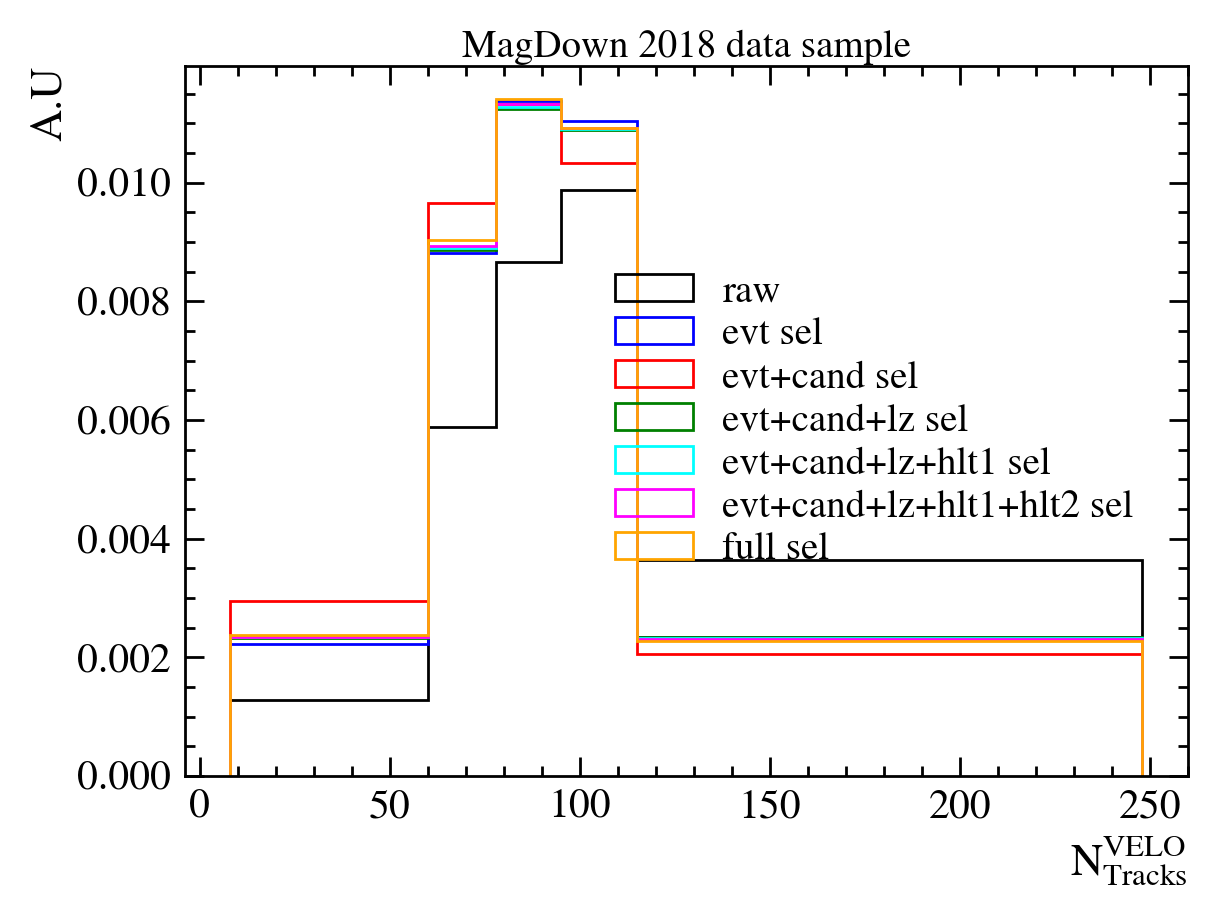

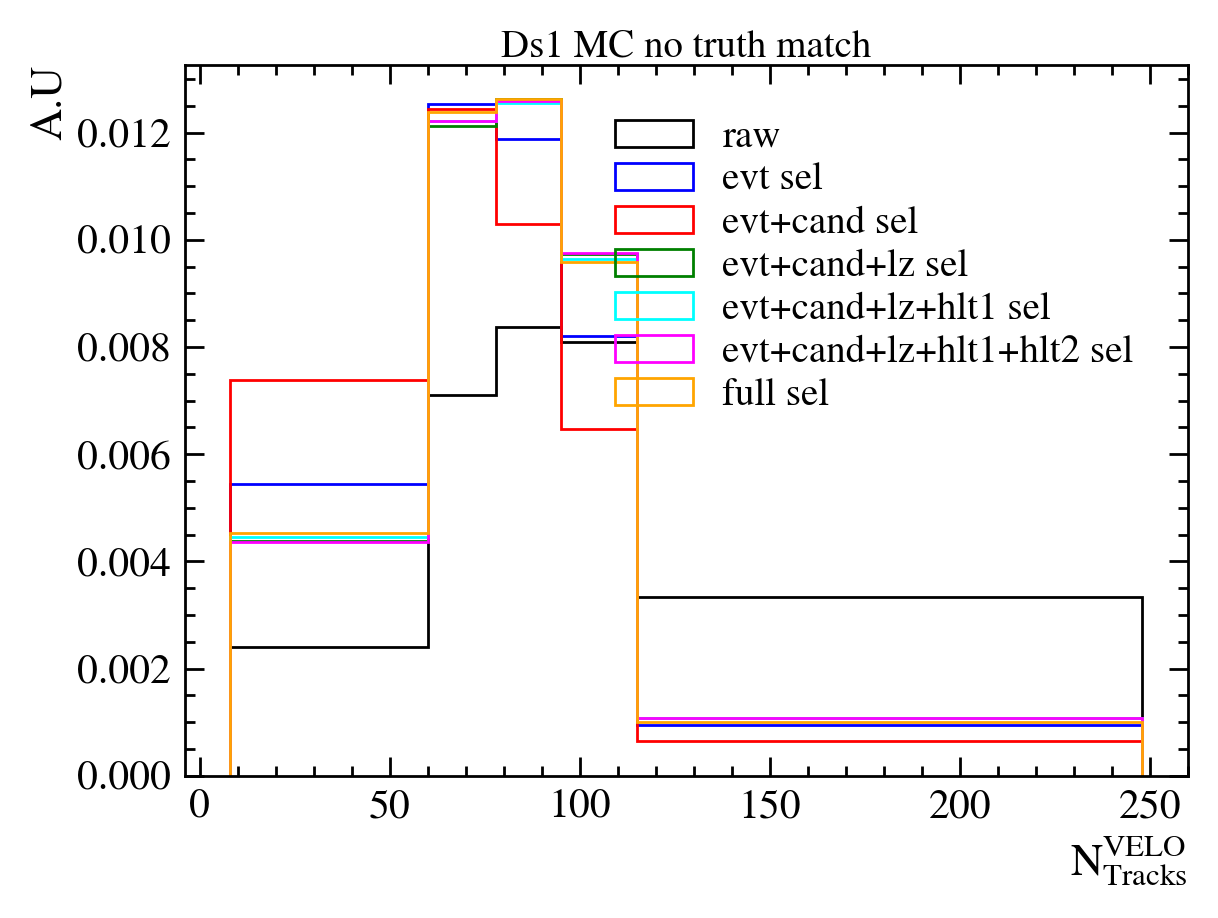

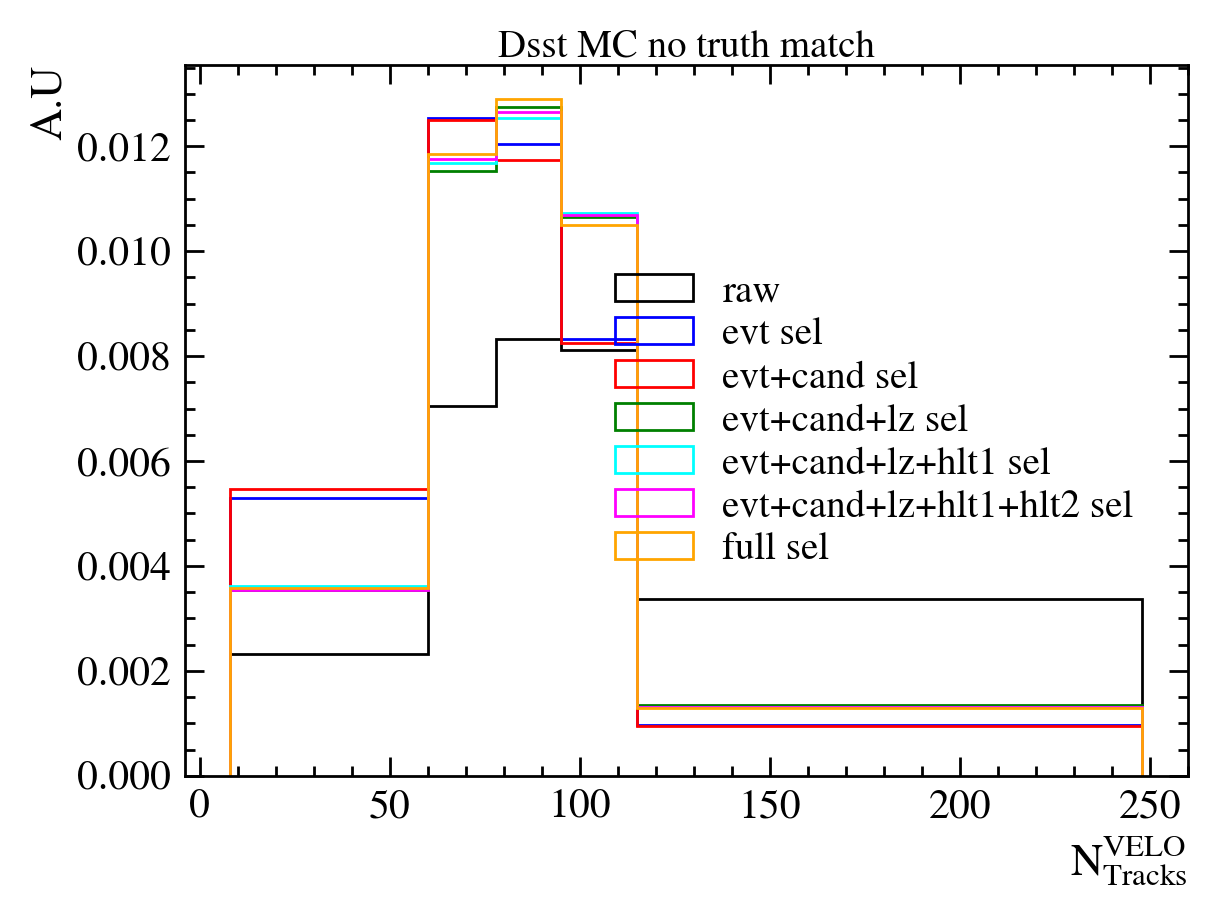

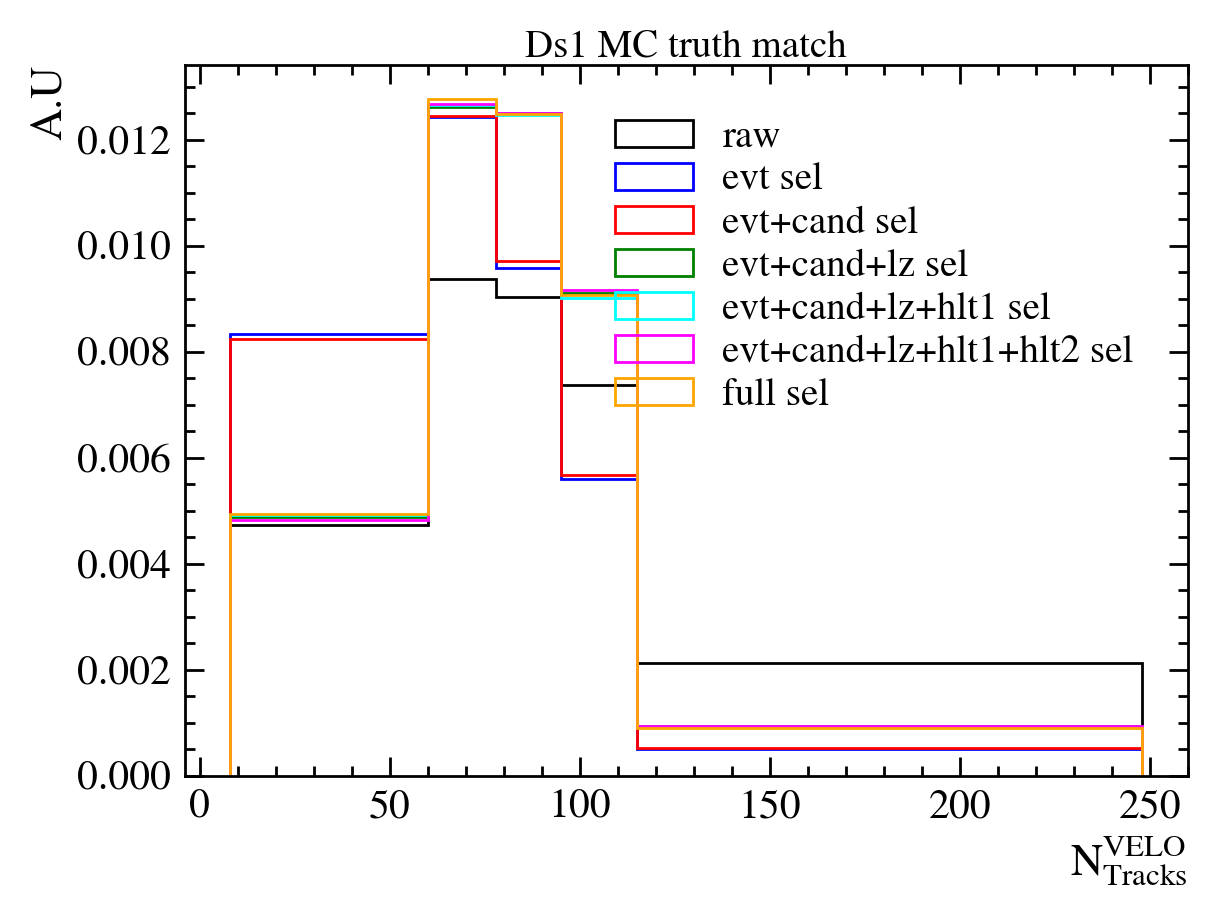

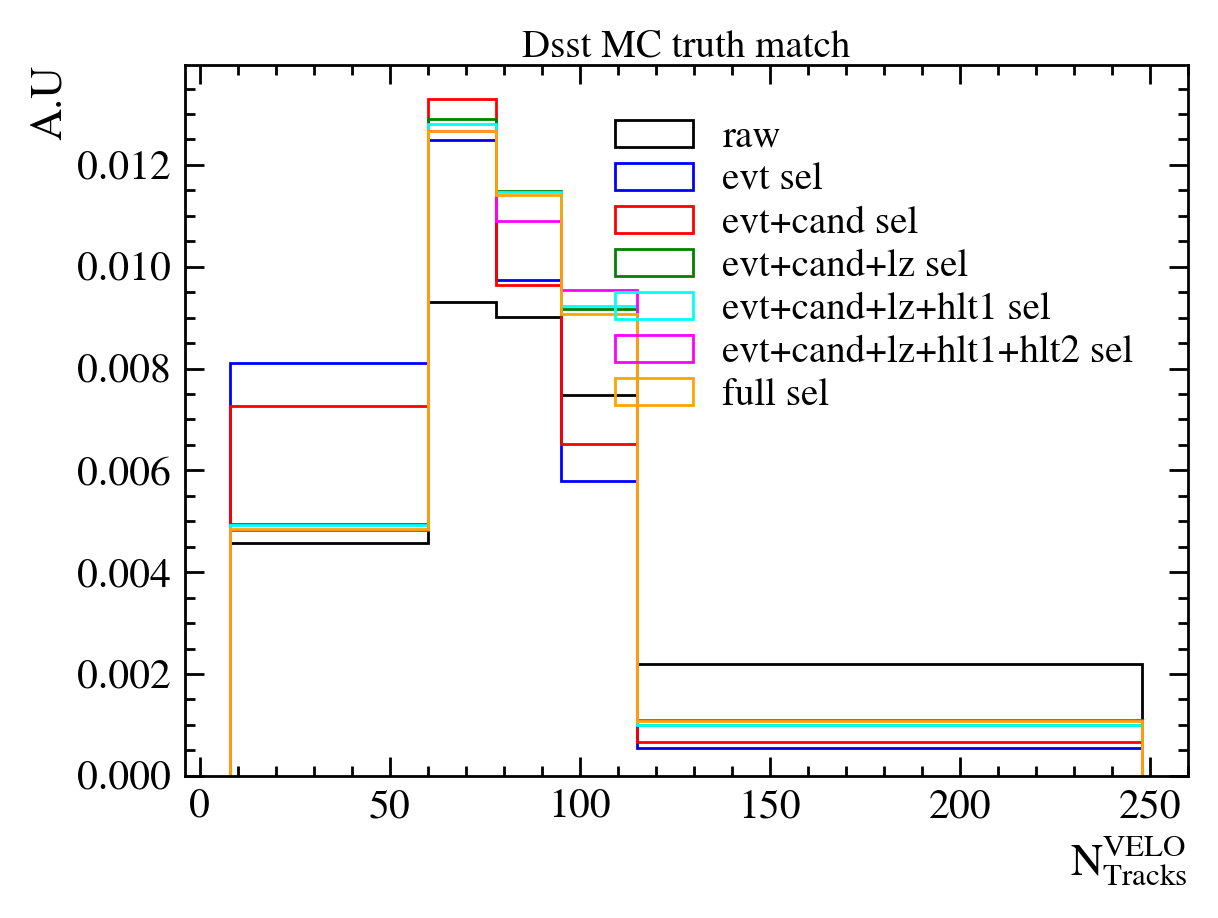

In [37]:
plt.figure(1000)
for df, label, color in zip(df_data_nVelo_5, labels, colors):
    plt.hist(df["nVeloTracks"], bins=nVelo_intervals, 
              color=color, histtype="step", density=True, label=label)
    plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
    plt.ylabel(r"A.U")
    plt.title(f"{pol} {year} data sample")
    plt.legend()
    plt.savefig(f"./plots/Exp_{pol}_{year}_nVelo_comp_5bins.pdf", dpi=300, bbox_inches='tight')

plt.figure(1001)
for df, label, color in zip(df_Ds1_MC_nVelo_5, labels, colors):
    plt.hist(df["nVeloTracks"], bins=nVelo_intervals, 
              color=color, histtype="step", density=True, label=label)
    plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
    plt.ylabel(r"A.U")
    plt.title(f"Ds1 MC no truth match")
    plt.legend()
    plt.savefig(f"./plots/Sim_Ds1_nVelo_comp_5bins.pdf", dpi=300, bbox_inches='tight')
    
plt.figure(1002)
for df, label, color in zip(df_Dsst_MC_nVelo_5, labels, colors):
    plt.hist(df["nVeloTracks"], bins=nVelo_intervals, 
              color=color, histtype="step", density=True, label=label)
    plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
    plt.ylabel(r"A.U")
    plt.title(f"Dsst MC no truth match")
    plt.legend()
    plt.savefig(f"./plots/Sim_Dsst_nVelo_comp_5bins.pdf", dpi=300, bbox_inches='tight')
    
plt.figure(1003)
for df, label, color in zip(df_Ds1_sig_nVelo_5, labels, colors):
    plt.hist(df["nVeloTracks"], bins=nVelo_intervals, 
              color=color, histtype="step", density=True, label=label)
    plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
    plt.ylabel(r"A.U")
    plt.title(f"Ds1 MC truth match")
    plt.legend()
    plt.savefig(f"./plots/Sim_Ds1_sig_nVelo_comp_5bins.pdf", dpi=300, bbox_inches='tight')
    
plt.figure(1004)
for df, label, color in zip(df_Dsst_sig_nVelo_5, labels, colors):
    plt.hist(df["nVeloTracks"], bins=nVelo_intervals, 
              color=color, histtype="step", density=True, label=label)
    plt.xlabel(r"$\mathrm{N}^{\mathrm{VELO}}_{\mathrm{Tracks}}$")
    plt.ylabel(r"A.U")
    plt.title(f"Dsst MC truth match")
    plt.legend()
    plt.savefig(f"./plots/Sim_Dsst_sig_nVelo_comp_5bins.pdf", dpi=300, bbox_inches='tight')